In [1]:
from CocoDataset import CocoDataset, Resize_wh, Normalizer,collater, ToTensor, collater
from torchvision import transforms

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
%matplotlib inline

In [2]:
char_data_root = '/home/workspace/chencheng/libc++/lib-mchar/datasets/char_recognize/'
coco_data_root = '/home/workspace/chencheng/Learning/ObjectDetection/Datasets/CoCodataset/'
training_set = CocoDataset(root_dir=coco_data_root,set='val2017',
                           transform=transforms.Compose([Resize_wh(size=(1024, 768))]))

CLASSES_NAME = (
    '__back_ground__', 'person', 'bicycle', 'car', 'motorcycle',
    'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
    'fire hydrant', 'stop sign', 'parking meter', 'bench',
    'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant',
    'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard',
    'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle',
    'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli',
    'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair',
    'couch', 'potted plant', 'bed', 'dining table', 'toilet',
    'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator',
    'book', 'clock', 'vase', 'scissors', 'teddy bear',
    'hair drier', 'toothbrush')

loading annotations into memory...
Done (t=0.49s)
creating index...
index created!


this is a demo

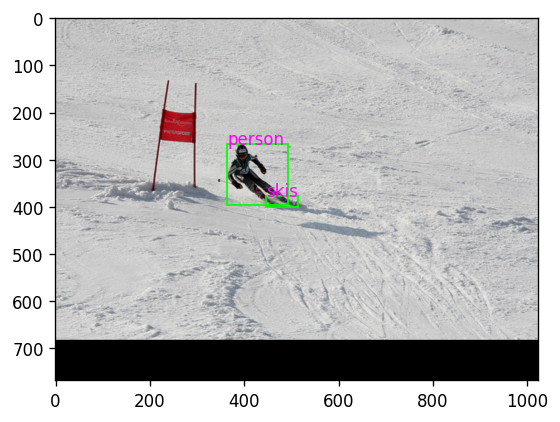

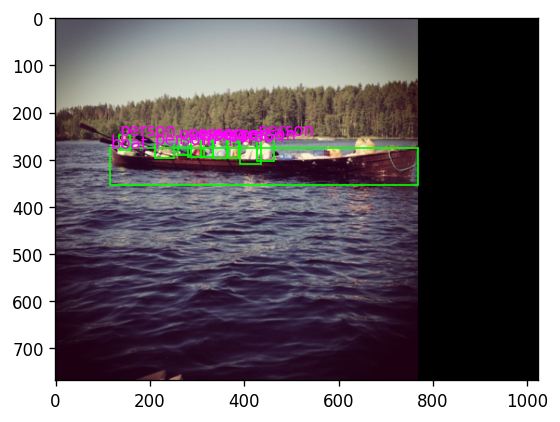

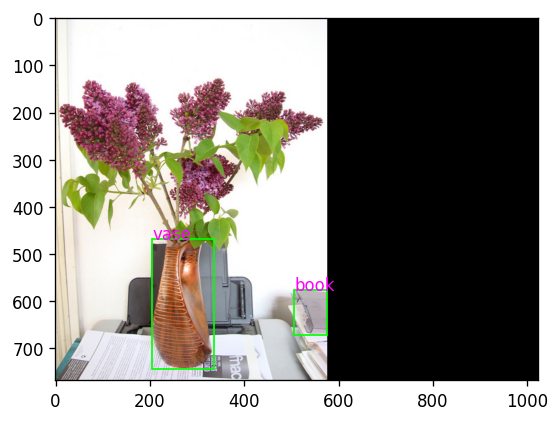

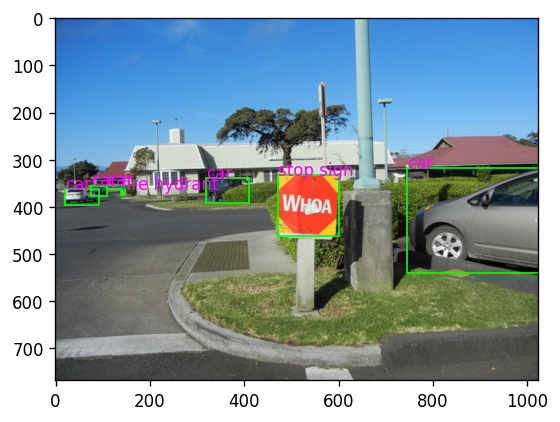

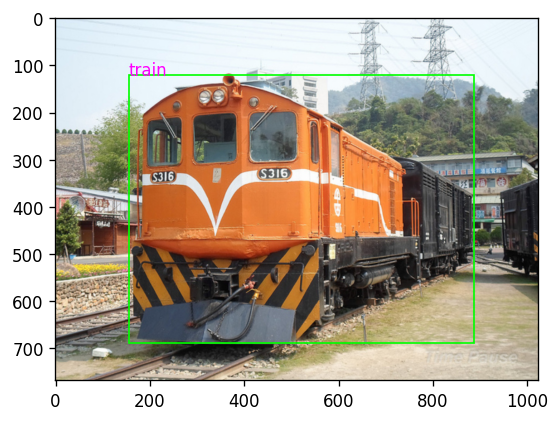

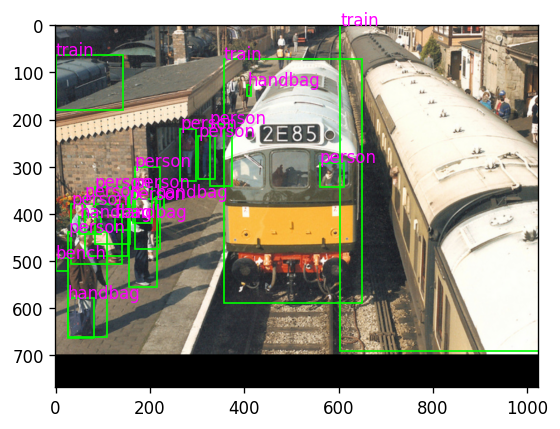

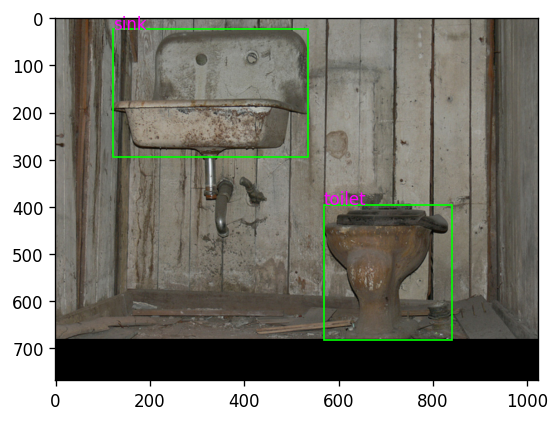

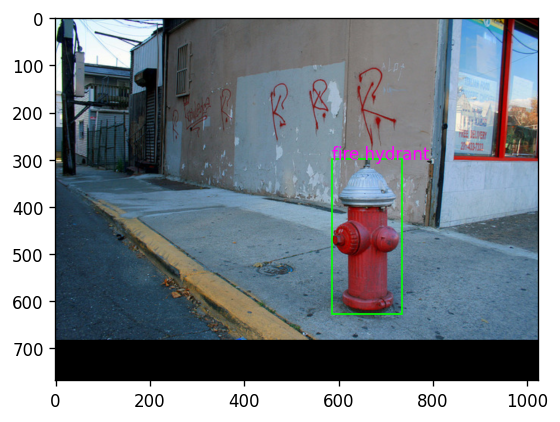

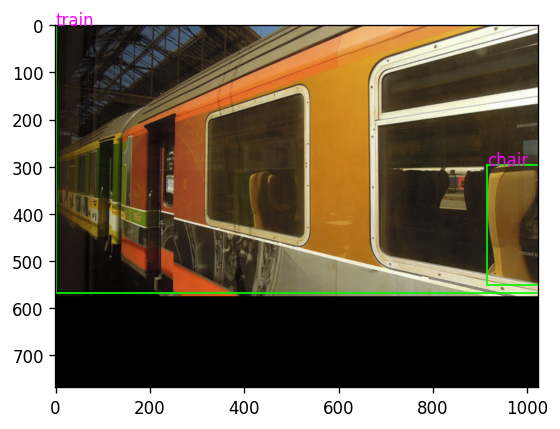

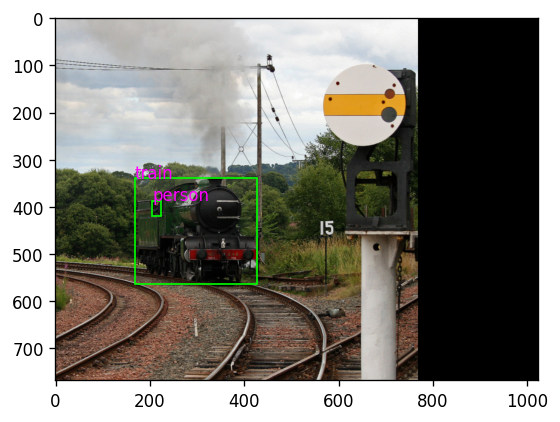

In [7]:
for i in random.sample(range(len(training_set)), 10):
    data = training_set[i]
    img = data['img']
    anno = data['anno']

    plt.figure(dpi=120)
    plt.imshow(img)
    for rect in anno:
        x1 = rect[0]
        y1 = rect[1]
        x2 = rect[2]
        y2 = rect[3]
        label_id = int(rect[4])
        labels = CLASSES_NAME[label_id+1]
        w =x2 - x1
        h = y2 - y1
        plt.gca().add_patch(patches.Rectangle((x1, y1), w, h, fill=False, color=(0, 1, 0)))
        plt.text(x1, y1, labels, color=(1, 0, 1))
    plt.show()

In [4]:
from torch.utils.data import DataLoader

In [5]:
generator = DataLoader(training_set, 
                       batch_size=4, 
                       num_workers=8,
                       collate_fn=collater)